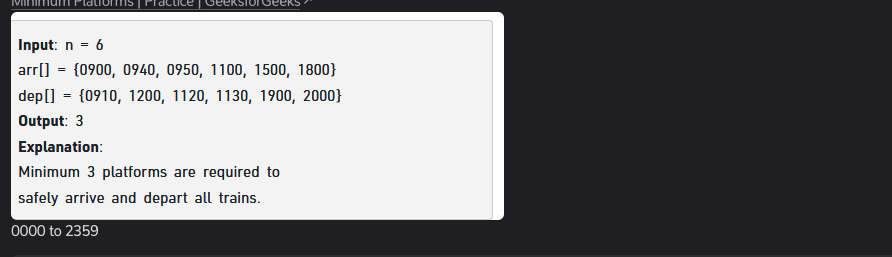

https://www.geeksforgeeks.org/problems/minimum-platforms-1587115620/1

we have n intervals, and find the maximum number of intervals intersecting in an interval

In [ ]:
int findPlatform(int arr[], int dep[], int n){
    vector<int> v(2460+5,0);
    for(int i=0;i<n;i++) v[arr[i]]++;
    for(int i=0;i<n;i++) v[dep[i]+1]--;
    for(int i=1;i<2460;i++) v[i]+=v[i-1];
    return *max_element(v.begin(),v.end());
}

this concept got missing from my array concepts

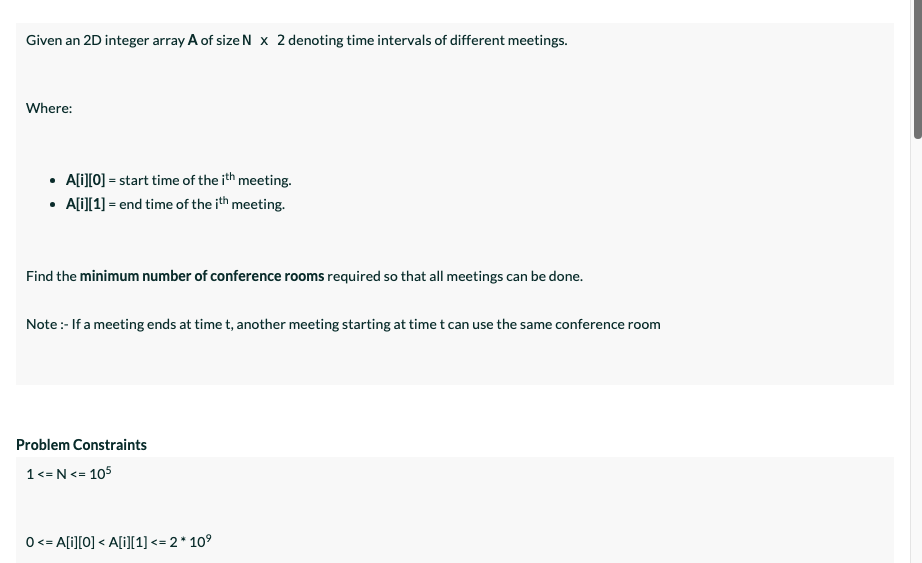

https://www.interviewbit.com/problems/meeting-rooms/

no way you can do this question just by array

# MAANG
do other meeting rooms

In [ ]:
int Solution::solve(vector<vector<int> > &ma) {
    map<int,int> m;
    for(auto interval: ma){
        int s=interval[0],e=interval[1];
        m[s]++;
        m[e]--;
    }
    int maxx=0;
    int sum=0;
    for(auto p: m){
        sum+=p.second;
        maxx=max(maxx,sum);
    }
    return maxx;
}

In [ ]:
int minMeetingRooms(vector<vector<int>>& ma) {
    priority_queue<vector<int>,vector<vector<int>>,greater<vector<int>>> pq;
    for(auto in: ma){
        pq.push({in[0],1});
        //while popping, as this is increasing pq
        //these 1 will keep coming and their sum
        //will show the intersection happening
        pq.push({in[1],-1});           
    }
    int ans=1,sum=0;
    while(!pq.empty()){
        int to=pq.top()[1];pq.pop();
        sum+=to;
        ans=max(ans,sum);
    }   
    return ans;
}

Also possible with sweep lines az

# MAANG
I think I have not done Grokking

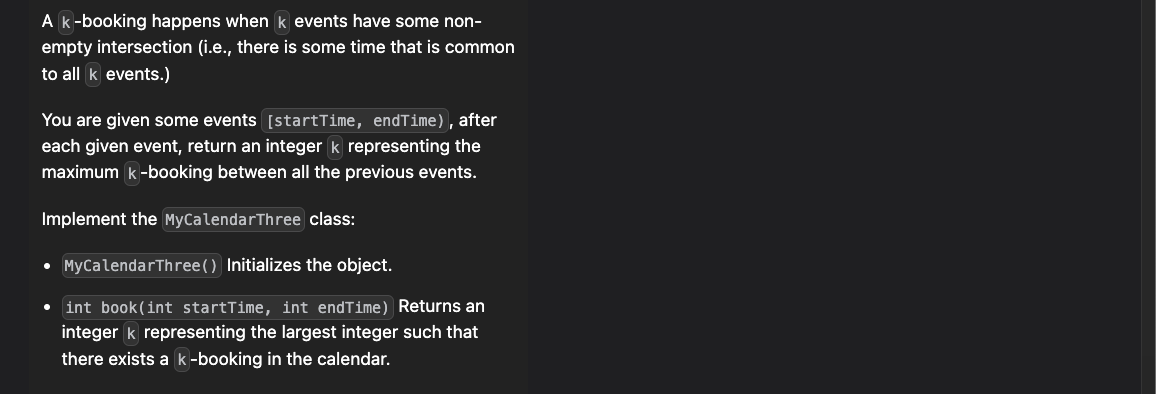

https://leetcode.com/problems/my-calendar-iii/description/

using the above is not efficient

In [ ]:
class MyCalendarThree {
    map<int,int> m;
public:
    MyCalendarThree() {
        
    }
    
    int book(int s, int e){
        int maxx=0;
        m[s]++;
        m[e]--;

        int sum=0;
        for(auto p: m){
            sum+=p.second;
            maxx=max(maxx,sum);
        }
        return maxx;
    }
};

calendar 2 is easy if done like above

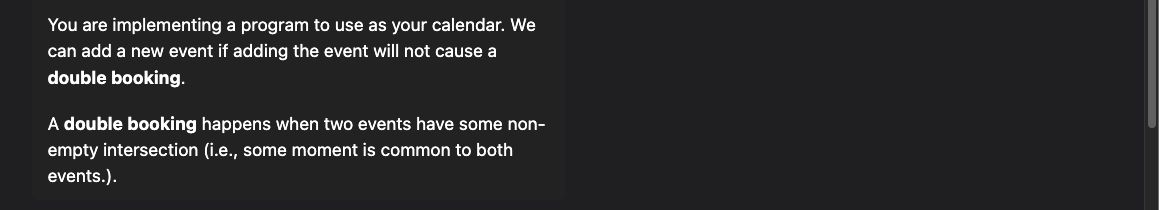

https://leetcode.com/problems/my-calendar-i/description/

In [ ]:
class MyCalendar {
    set<pair<int,int>>se;
    public:
        MyCalendar() {
            
        }
        
        bool book(int s, int e) {
            auto it = se.upper_bound({s,INT_MIN});
            if(it!=se.end()){
              //it->first s se zyada to by definition heen hoga
              //par jaruri nahi ue quantittu it wali e se zyada hon
                if(e>it->first) return 0;
            }

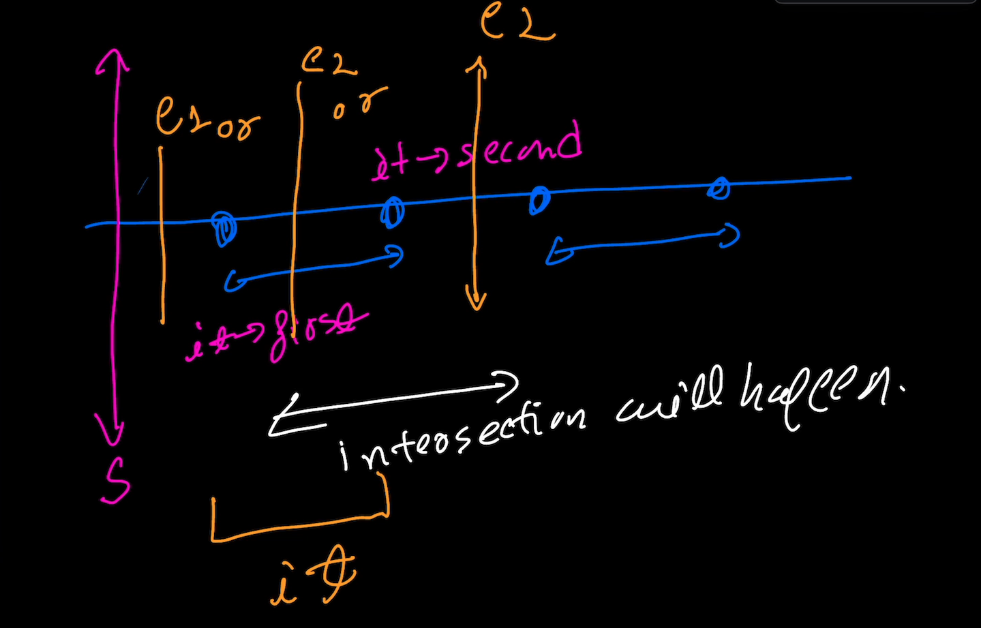

In [ ]:
auto it = se.upper_bound({s,INT_MIN});
if(it!=se.begin()){
    auto it1 = it;
    it1--;
    if(it1->second>s) return 0;
}
se.insert({s,e});
return 1;
}
};

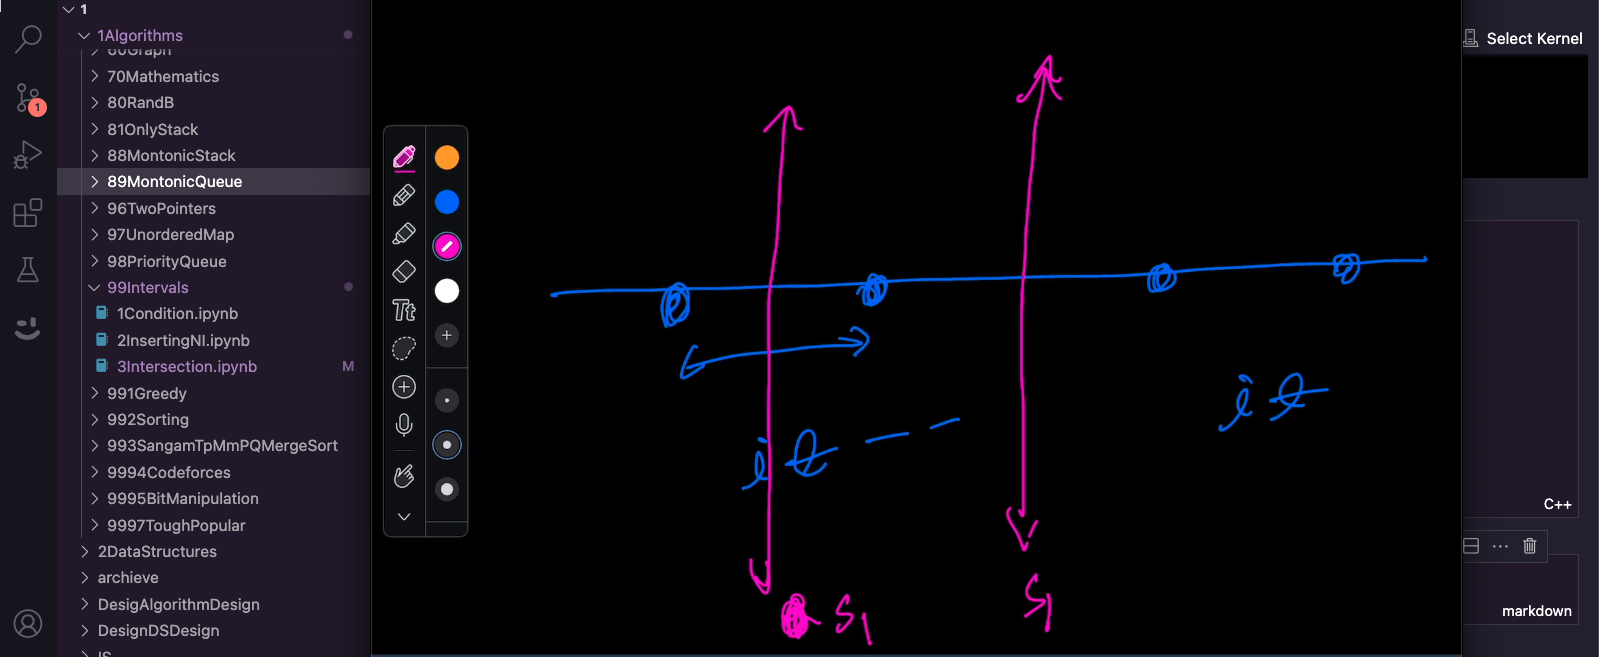

In [ ]:
class MyCalendar {
    set<pair<int,int>>se;
    public:
        MyCalendar() {
            
        }
        
        bool book(int s, int e) {
            auto it = se.upper_bound({s,INT_MIN});
            if(it!=se.end()){
              //it->first s se zyada to by definition heen hoga
              //par jaruri nahi ue quantittu it wali e se zyada hon
                if(e>it->first) return 0;
            }
            if(it!=se.begin()){
                auto it1 = it;
                it1--;
                if(s<it1->second) return 0;
            }
            se.insert({s,e});
            return 1;
        }
    };
    

# MAANG if try to do calendar 3 and 2 similarly

doubt

Why for the question 
https://leetcode.com/problems/insert-interval/description/

This is my submitted code 
class Solution {
public:
    void insertInterval(vector<vector<int>>& intervals, vector<int>& ni){
        vector<int> tmp={ni[0],INT_MIN};
        intervals.insert(upper_bound(intervals.begin(),intervals.end(),tmp),ni);
    }

    vector<vector<int>> merge(vector<vector<int>>& intervals) {
       vector<vector<int>> merged;
        for(auto interval:intervals){
            if(merged.empty() or merged.back()[1]<interval[0])
                merged.push_back(interval);
            else merged.back()[1]=max(merged.back()[1],interval[1]);
        }
       return merged;
    }


    vector<vector<int>> insert(vector<vector<int>>& ma, vector<int>& ni) {
        insertInterval(ma,ni);
        return merge(ma);
    }
};

This code works   

vector<int> tmp={ni[0],INT_MIN};
intervals.insert(upper_bound(intervals.begin(),intervals.end(),tmp),ni);

as well as  this
        vector<int> tmp={newInterval[0],INT_MAX};
        intervals.insert(lower_bound(intervals.begin(),intervals.end(),tmp),newInterval);   
But for https://leetcode.com/problems/my-calendar-i/description/ only this work 
class MyCalendar {
set<pair<int,int>>se;
public:
    MyCalendar() {
        
    }
    
    bool book(int s, int e) {
        auto it = se.upper_bound({s,INT_MIN});
        if(it!=se.end()){
            if(it->first<e) return 0;
        }
        if(it!=se.begin()){
            auto it1 = --it;
            if(it1->second>s) return 0;
        }
        se.insert({s,e});
        return 1;
    }
};

and not
auto it = se.lower_bound({e,INT_MAX});




leetcode premium    
https://leetcode.com/problems/employee-free-time/description/?envType=list&envId=ppzcw7vd
https://www.designgurus.io/course-play/grokking-the-coding-interview/doc/63936f6bb15a00b56fb3cf01

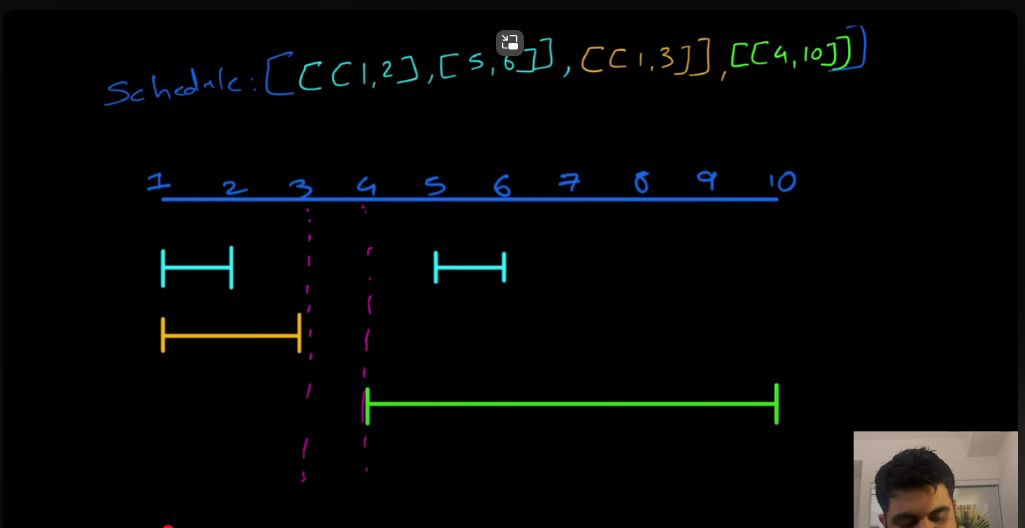

find the free time

[Merge](/Users/tarunmali/yTM/code/cpp/1/1Algorithms/992Sorting/3MergeSort/1.ipynb)

# Intersection with capcity

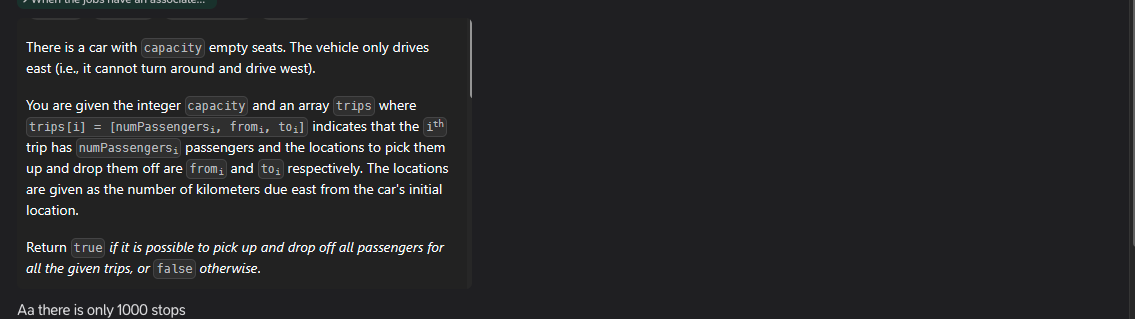

https://leetcode.com/problems/car-pooling/

In [ ]:
bool carPooling(vector<vector<int>>& trips, int capacity) {
    int stops[1001]={0};
    for(auto t: trips){
        stops[t[1]]+=t[0];
        stops[(t[2]-1)+1]-=t[0];
    }

    if(stops[0]>capacity) return 0;
    for(int i=1;i<=1000;i++){
        stops[i]+=stops[i-1];
        if(stops[i]>capacity) return 0;
    } 
    return 1;
}

In [ ]:
bool carPooling(vector<vector<int>>& trips, int capacity) {
    map<int,int> noOfPersonsAtAPoint;
    for(auto t: trips){
        noOfPersonsAtAPoint[t[1]]+=t[0];
        noOfPersonsAtAPoint[t[2]]-=t[0];
    }
    int onboard=0;
    for(auto p: noOfPersonsAtAPoint){
        onboard+=p.second;
        if(onboard>capacity){
            return 0; 
        } 
    }
    return 1;
}